In [46]:
#Creating Dataset

queries = []
answers = []
def create_dataset():
    for i in range(100):
        for j in range(100):
            query1 = str(i) + '+' + str(j)
            query2 = str(i) + '-' + str(j)
            answer1 = '+' + str(i+j)
            if(i-j < 0):
                answer2 = str(i-j)
            else:
                answer2 = '+' + str(i-j)
            if(len(query1) < 5):
                query1 = ('{: <5}'.format(query1))
                query2 = ('{: <5}'.format(query2))
            if(len(answer1) < 4):
                answer1 = ('{: <4}'.format(answer1))   
            if(len(answer2) < 4):
                answer2 = ('{: <4}'.format(answer2))
            queries.append(query1)
            queries.append(query2)
            answers.append(answer1)
            answers.append(answer2)
create_dataset()
print(len(queries))
print(len(answers))

20000
20000


In [47]:
import numpy as np

x = np.zeros((5, 13)) 
print(x)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [48]:
#One-hot encoding

dictionary_encoding = {
    '0' : 0,
    '1' : 1,
    '2' : 2,
    '3' : 3,
    '4' : 4, 
    '5' : 5, 
    '6' : 6,
    '7' : 7,
    '8' : 8,
    '9' : 9, 
    '+' : 10,
    '-' : 11,
    ' ' : 12
}
encoded_queries = []
encoded_answers = []
def one_hot_encoding():
    for query in queries:
        temp = np.zeros((5, 13))                   
        for i,c in enumerate(query):
            temp[i][dictionary_encoding.get(c)] = 1
        encoded_queries.append(temp)

    for answer in answers:
        temp = np.zeros((4, 13))                   
        for i,c in enumerate(answer):
            temp[i][dictionary_encoding.get(c)] = 1
        encoded_answers.append(temp)
one_hot_encoding()
encoded_queries=np.array(encoded_query)
encoded_answers=np.array(encoded_answers)
print(len(encoded_queries))
print(encoded_answers)

20000
[[[0. 0. 0. ... 1. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 1.]
  [0. 0. 0. ... 0. 0. 1.]]

 [[0. 0. 0. ... 1. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 1.]
  [0. 0. 0. ... 0. 0. 1.]]

 [[0. 0. 0. ... 1. 0. 0.]
  [0. 1. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 1.]
  [0. 0. 0. ... 0. 0. 1.]]

 ...

 [[0. 0. 0. ... 1. 0. 0.]
  [0. 1. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 1.]
  [0. 0. 0. ... 0. 0. 1.]]

 [[0. 0. 0. ... 1. 0. 0.]
  [0. 1. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 1. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 1.]
  [0. 0. 0. ... 0. 0. 1.]]]


In [49]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, RepeatVector, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

In [50]:
model = Sequential()
model.add(LSTM(128, input_shape=(5, 13), return_sequences=False))
model.add(RepeatVector(4))
model.add(LSTM(128, return_sequences=True))
model.add(Dense(13, activation='softmax'))

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

## Encoder-Decoder

* The model has two lstm layers and a dense layer with softmax activation.
* The first lstm layer acts as encoder. It takes input of (5*13) array (The query) and creates a one-dimensional output of length 128.
* The  RepeatVector(4), duplicates the output of previous layer 4 times. Hence the input of the 2nd lstm layer is 4, 128 length vectors.
* the second lstm layer acts as decoder. It produces the 4 outut vector of length 13.
* Finally this (4*13) array is passed through the dense layer with softmax activation to give the final predicted value of the model.
  

In [65]:
from sklearn.model_selection import train_test_split

In [52]:
X_training, X_test, Y_training, Y_test = train_test_split(encoded_queries, encoded_answers, test_size=0.15, shuffle=True)

X_train,X_val,Y_train,Y_val = train_test_split(X_training,Y_training, test_size=0.15/0.85, shuffle=True)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(14000, 5, 13)
(3000, 5, 13)
(3000, 5, 13)


In [53]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 128)               72704     
                                                                 
 repeat_vector_4 (RepeatVec  (None, 4, 128)            0         
 tor)                                                            
                                                                 
 lstm_9 (LSTM)               (None, 4, 128)            131584    
                                                                 
 dense_4 (Dense)             (None, 4, 13)             1677      
                                                                 
Total params: 205965 (804.55 KB)
Trainable params: 205965 (804.55 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val),
    epochs=50,
    batch_size=16
)


Epoch 1/50
875/875 [==============================] - 7s 6ms/step - loss: 1.3734 - accuracy: 0.5139 - val_loss: 1.1634 - val_accuracy: 0.5853
Epoch 2/50
875/875 [==============================] - 5s 5ms/step - loss: 1.0580 - accuracy: 0.6157 - val_loss: 0.9907 - val_accuracy: 0.6351
Epoch 3/50
875/875 [==============================] - 5s 5ms/step - loss: 0.9406 - accuracy: 0.6577 - val_loss: 0.8931 - val_accuracy: 0.6801
Epoch 4/50
875/875 [==============================] - 5s 5ms/step - loss: 0.8685 - accuracy: 0.6840 - val_loss: 0.8259 - val_accuracy: 0.7006
Epoch 5/50
875/875 [==============================] - 5s 5ms/step - loss: 0.8138 - accuracy: 0.7030 - val_loss: 0.7984 - val_accuracy: 0.7034
Epoch 6/50
875/875 [==============================] - 5s 5ms/step - loss: 0.7793 - accuracy: 0.7120 - val_loss: 0.7777 - val_accuracy: 0.7107
Epoch 7/50
875/875 [==============================] - 5s 6ms/step - loss: 0.7423 - accuracy: 0.7223 - val_loss: 0.7697 - val_accuracy: 0.7107
Epoch 

In [55]:
result = model.evaluate(X_test,Y_test)
print("Loss: %f \nAccuracy: %f" % (result[0], result[1]))

94/94 [==============================] - 0s 2ms/step - loss: 0.0120 - accuracy: 0.9977
Loss: 0.012022 
Accuracy: 0.997750


In [56]:
reversed_queries = [query[::-1] for query in queries]
reversed_answers = [answer[::-1] for answer in answers]

In [57]:
reverse_encoded_queries = []
reverse_encoded_answers = []
def one_hot_encoding_reverse():
    for query in reversed_queries:
        temp = np.zeros((5, 13))                   
        for i,c in enumerate(query):
            temp[i][dictionary_encoding.get(c)] = 1
        reverse_encoded_queries.append(temp)

    for answer in reversed_answers:
        temp = np.zeros((4, 13))                   
        for i,c in enumerate(answer):
            temp[i][dictionary_encoding.get(c)] = 1
        reverse_encoded_answers.append(temp)
one_hot_encoding_reverse()
reverse_encoded_queries=np.array(reverse_encoded_queries)
reverse_encoded_answers=np.array(reverse_encoded_answers)
print(reverse_encoded_queries)
print(len(reverse_encoded_answers))

[[[0. 0. 0. ... 0. 0. 1.]
  [0. 0. 0. ... 0. 0. 1.]
  [1. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 1. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 1.]
  [0. 0. 0. ... 0. 0. 1.]
  [1. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 1. 0.]
  [1. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 1.]
  [0. 0. 0. ... 0. 0. 1.]
  [0. 1. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 1. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 1. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 1. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 1. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]
20000


In [58]:
X_training_rev, X_test_rev, Y_training_rev, Y_test_rev = train_test_split(reverse_encoded_queries, reverse_encoded_answers, test_size=0.15, shuffle=True)

X_train_rev,X_val_rev,Y_train_rev,Y_val_rev = train_test_split(X_training_rev,Y_training_rev, test_size=0.15/0.85, shuffle=True)

print(X_train_rev.shape)
print(X_val_rev.shape)
print(X_test_rev.shape)

(14000, 5, 13)
(3000, 5, 13)
(3000, 5, 13)


In [59]:
model_reversed = Sequential()
model_reversed.add(LSTM(128, input_shape=(5, 13), return_sequences=False))
model_reversed.add(RepeatVector(4))
model_reversed.add(LSTM(128, return_sequences=True))

model_reversed.add(Dense(13, activation="softmax"))

model_reversed.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [60]:
model_reversed.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 128)               72704     
                                                                 
 repeat_vector_5 (RepeatVec  (None, 4, 128)            0         
 tor)                                                            
                                                                 
 lstm_11 (LSTM)              (None, 4, 128)            131584    
                                                                 
 dense_5 (Dense)             (None, 4, 13)             1677      
                                                                 
Total params: 205965 (804.55 KB)
Trainable params: 205965 (804.55 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [61]:
history_reversed = model_reversed.fit(X_train_rev, Y_train_rev, validation_data=(X_val_rev, Y_val_rev),
    epochs=50,
    batch_size=16
)

Epoch 1/50
875/875 [==============================] - 7s 6ms/step - loss: 1.3410 - accuracy: 0.5210 - val_loss: 1.1754 - val_accuracy: 0.5771
Epoch 2/50
875/875 [==============================] - 4s 5ms/step - loss: 1.0041 - accuracy: 0.6354 - val_loss: 0.9099 - val_accuracy: 0.6593
Epoch 3/50
875/875 [==============================] - 4s 5ms/step - loss: 0.8501 - accuracy: 0.6907 - val_loss: 0.8270 - val_accuracy: 0.6842
Epoch 4/50
875/875 [==============================] - 5s 5ms/step - loss: 0.7681 - accuracy: 0.7143 - val_loss: 0.7314 - val_accuracy: 0.7297
Epoch 5/50
875/875 [==============================] - 6s 7ms/step - loss: 0.7147 - accuracy: 0.7331 - val_loss: 0.6884 - val_accuracy: 0.7454
Epoch 6/50
875/875 [==============================] - 5s 6ms/step - loss: 0.6771 - accuracy: 0.7449 - val_loss: 0.6540 - val_accuracy: 0.7548
Epoch 7/50
875/875 [==============================] - 5s 5ms/step - loss: 0.6322 - accuracy: 0.7601 - val_loss: 0.5933 - val_accuracy: 0.7720
Epoch 

In [62]:
rev_eval_result = model.evaluate(X_test_rev,Y_test_rev)

94/94 [==============================] - 0s 2ms/step - loss: 19.8451 - accuracy: 0.1267


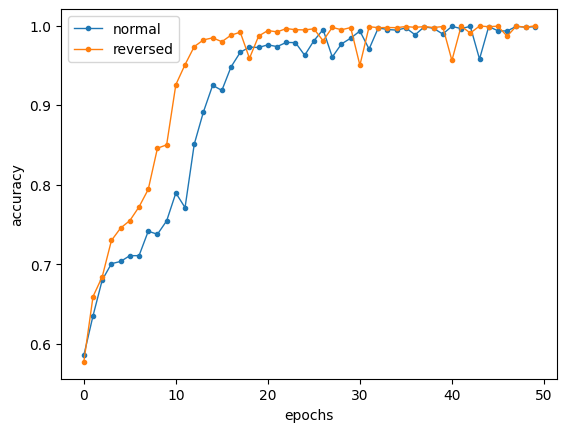

In [63]:
import matplotlib.pyplot as plt

model_accuracy = history.history['val_accuracy']
model_reversed_accuracy = history_reversed.history['val_accuracy']
x_len = len(model_accuracy)
epochs = range(x_len)

plt.plot(epochs, model_accuracy, linestyle = '-',  label = 'normal', marker ='.', linewidth=1)
plt.plot(epochs,model_reversed_accuracy, linestyle = '-',  label = 'reversed', marker ='.', linewidth=1)
plt.legend(loc="best")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()